In [143]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import SimpleITK as sitk

from utils.jupyter_utils import imshow3
from utils.file_io import load_image, h5_multi_load

In [41]:
def make_minip(img, dimension):
    
    proj = sitk.MinimumProjection(img, dimension)
    
    return proj

In [ ]:
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.N
    default_value = 100.0
    return sitk.Resample(image, transform,
                         interpolator, default_value)

In [2]:
!ls metadata

data_reference.csv test.csv           trimmed.csv
reference.csv      train.csv          val.csv


In [3]:
meta_data_csv = pd.read_csv('metadata/trimmed.csv', header=None, names=['img_id', 'label'])

In [4]:
trimmed_dir = os.path.abspath('trimmed') 

In [151]:
preview_index = 100
cur_fn = '%d.mha' % (meta_data_csv['img_id'][preview_index])
cur_path = os.path.join(trimmed_dir, cur_fn)

In [152]:
im = load_image(cur_path)

In [153]:
im.GetDirection(), im.GetSpacing(), im.GetOrigin(), im.GetSize(), np.array(im.GetSpacing()) * np.array(im.GetSize())

((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (0.976562, 0.976562, 1.0),
 (-207.9, -244.5, -348.5),
 (512, 512, 393),
 array([499.999744, 499.999744, 393.      ]))

In [154]:
im_arr = sitk.GetArrayFromImage(im)

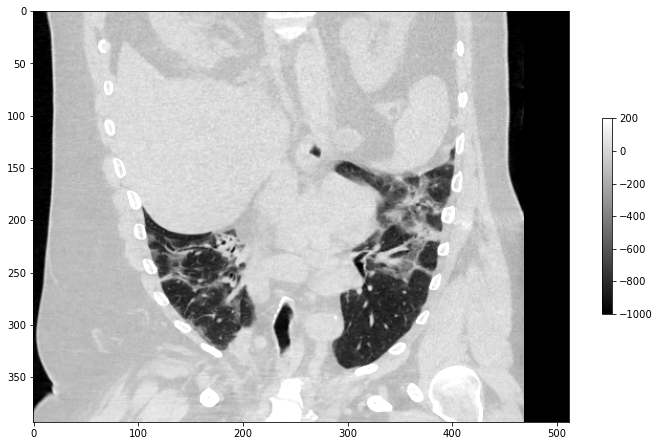

In [155]:
plt.figure(figsize=(12,12))
plt.imshow(im_arr[:,256,:], cmap='gray')
plt.clim([-1000, 200])
plt.colorbar(shrink=.3)

In [156]:
im_arr.shape

(393, 512, 512)

In [157]:
imshow3(im_arr, figsize=(10,10), s=0)

interactive(children=(IntSlider(value=0, description='Slice', max=392), FloatSlider(value=-3024.0, description…

In [127]:
minip = make_minip(im[:,252:260,:], 1)

In [128]:
minip.GetDirection(), minip.GetSpacing(), minip.GetOrigin(), minip.GetSize(), np.array(minip.GetSpacing()) * np.array(minip.GetSize())

((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (0.801, 6.408, 0.7999999999999999),
 (-216.3963, -2.8255000000000052, 1505.2),
 (512, 1, 432),
 array([410.112,   6.408, 345.6  ]))

In [129]:
minip_arr = sitk.GetArrayFromImage(minip)

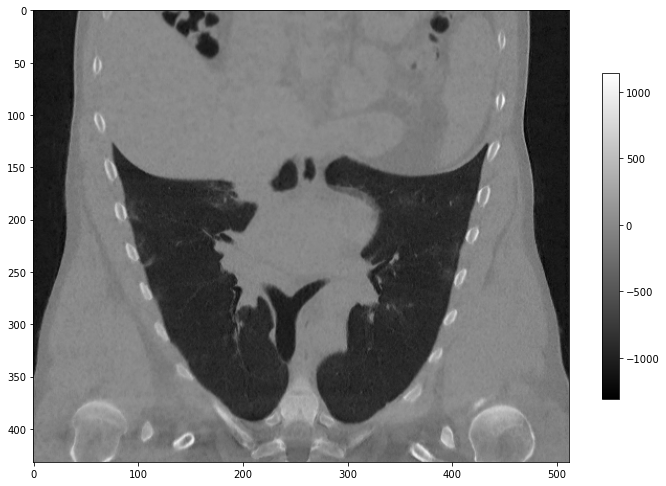

In [131]:
plt.figure(figsize=(12,12))
plt.imshow(minip_arr.squeeze(), cmap='gray')
plt.colorbar(shrink=.5)

In [123]:
minip = make_minip(im[:,:,250:255], 2)

In [124]:
minip.GetDirection(), minip.GetSpacing(), minip.GetOrigin(), minip.GetSize(), np.array(minip.GetSpacing()) * np.array(minip.GetSize())

((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (0.801, 0.801, 3.9999999999999996),
 (-216.3963, -204.6775, 1705.6000000000001),
 (512, 512, 1),
 array([410.112, 410.112,   4.   ]))

In [125]:
minip_arr = sitk.GetArrayFromImage(minip)

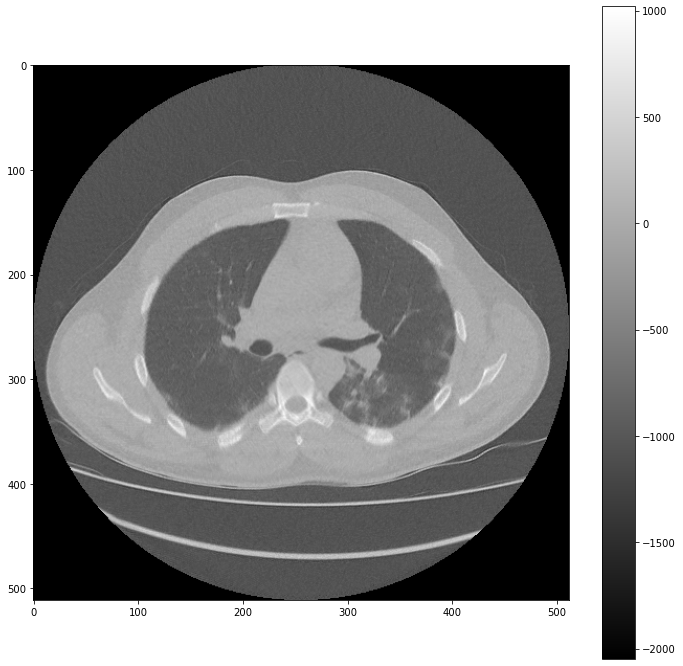

In [126]:
plt.figure(figsize=(12,12))
plt.imshow(minip_arr.squeeze(), cmap='gray')
plt.colorbar()

In [144]:
test_ = h5_multi_load('coronal_dir/848_0.hdf5')


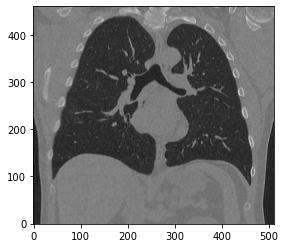

In [147]:
plt.imshow(test_['img'], origin='lower', cmap='gray')

In [149]:
test_['img'].shape

(462, 512)